In [ ]:
''' statements to import libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from scipy.stats import kurtosis
from scipy import stats

from pandas.api.types import CategoricalDtype

In [ ]:
'''statements to add csv files, remove duplicates etc
'''
#White wine
white_df = pd.read_csv('wine+quality/winequality-white.csv', sep= ';')
white_copy = white_df.copy()
white_copy.columns = white_copy.columns.str.replace(' ', '_')
white_copy = white_copy.drop_duplicates()
if 'colour' not in white_copy.columns:
    white_copy['colour'] = 'white'
else:
    pass

#Red wine
red_df = pd.read_csv('wine+quality/winequality-red.csv', sep = ';')
red_copy = red_df.copy()
if 'colour' not in red_copy.columns:
    red_copy['colour'] = 'red'
else:pass
red_copy.columns = red_copy.columns.str.replace(' ', '_')
red_copy = red_copy.drop_duplicates()

white_red_df = pd.concat([white_copy, red_copy])

white_outliers = white_copy.copy()
red_outliers = red_copy.copy()
white_red_df_outliers = white_red_df.copy()

In [ ]:
''' add new column to wine_quality'''
if 'quality_label' not in white_copy.columns:
    white_copy['quality_label'] = white_copy.quality.apply(lambda value: 'low' if value <= 5 else 'medium' if value >= 7 else 'high')
else:
    pass


if 'quality_label' not in red_copy.columns:
    red_copy['quality_label'] = red_copy.quality.apply(lambda value: 'low' if value <= 5 else 'medium' if value >= 7 else 'high')
else:
    pass

if 'quality_label' not in white_red_df.columns:
    white_red_df['quality_label'] = white_red_df.quality.apply(lambda value: 'low' if value <= 5 else 'medium' if value >= 7 else 'high')
else:
    pass

In [ ]:
'''making Good Medium Bad have a specified order'''
category_order = ['low', 'medium', 'high']
red_copy['quality_label'] = red_copy['quality_label'].astype(CategoricalDtype(categories=category_order, ordered=True))



In [ ]:
'''colours and stylings'''
white_color= '#c1a43c'
red_color = '#fc646a'
all_wine_color = '#6464db'
background_grey = '#ede6e6'

In [ ]:
'''useful when cycling through each dependent varialbe to investigate my independent variable - good medium bad'''
col_lst = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

Lets work first with Red Wine. </br>
lets identify the outliers first

In [ ]:
# sns.histplot(red_copy.sulphates, kde = True)
# plt.show()
# data = red_copy.sulphates
# z_scores = stats.zscore(data)
# threshold =2
# #outliers = np.where(np.abs(z_scores) > threshold)[0]
# outliers = red_copy.index[np.abs(z_scores) > threshold]

# red_copy2 = red_copy.drop(outliers)
# sns.histplot(red_copy2.sulphates, kde = True)
# plt.show()

In [83]:
def outlier_drop_z(df_outlier, col, threshold):
    z_scores = stats.zscore(df_outlier[col])
    threshold = threshold
    outliers = df_outlier.index[np.abs(z_scores) > threshold]
    num_outliers_removed = len(outliers)
    df_outlier = df_outlier.drop(outliers)
    return df_outlier

def outlier_drop_iqr(df_outlier, col, threshold):
    q1 = df_outlier[col].quantile(0.25)
    q3 = df_outlier[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    df_outlier = df_outlier[(df_outlier[col] >= lower_bound) & (df_outlier[col] <= upper_bound)]
    return df_outlier
    




    
    


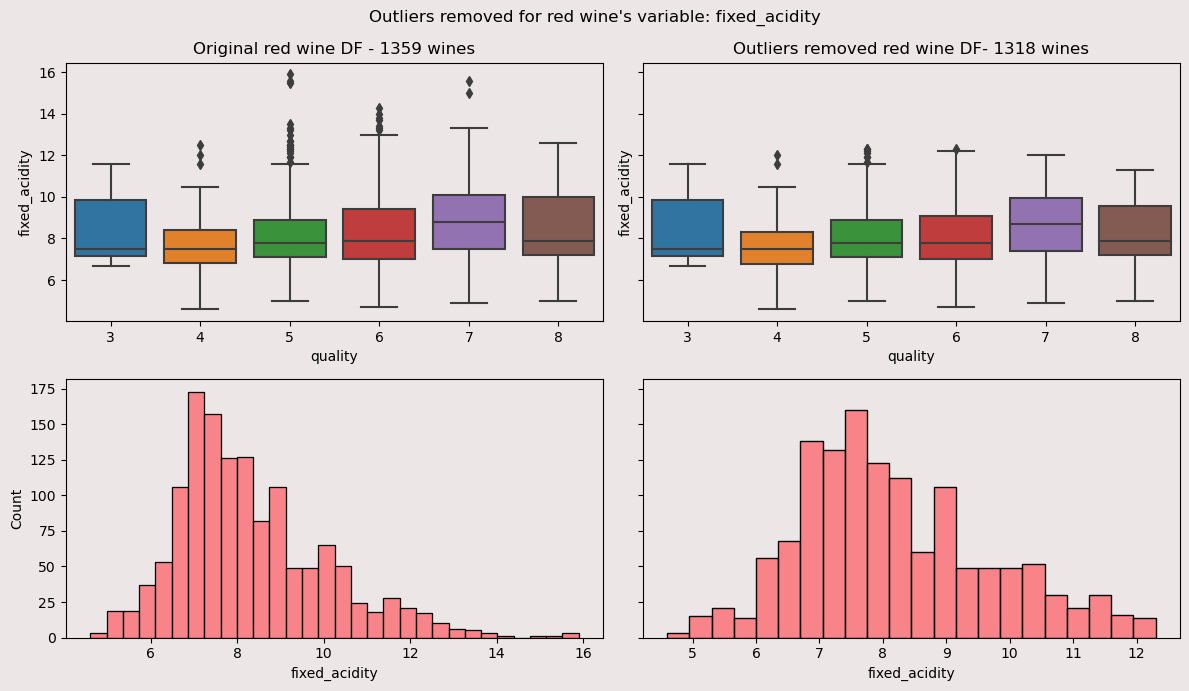

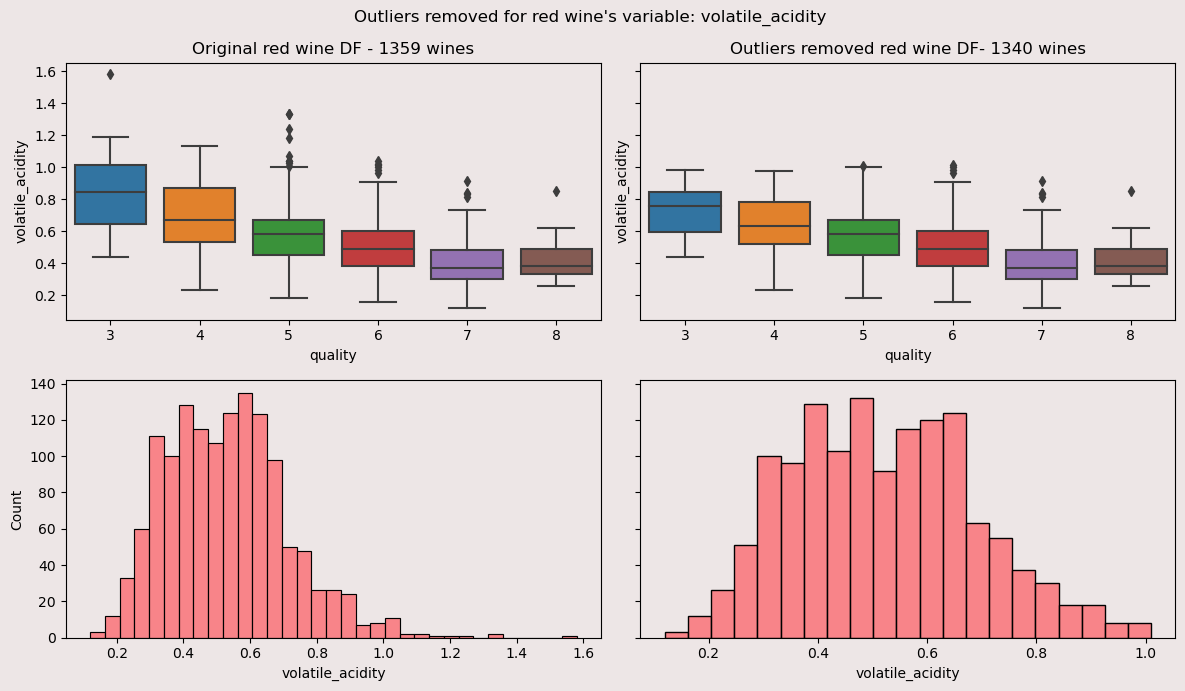

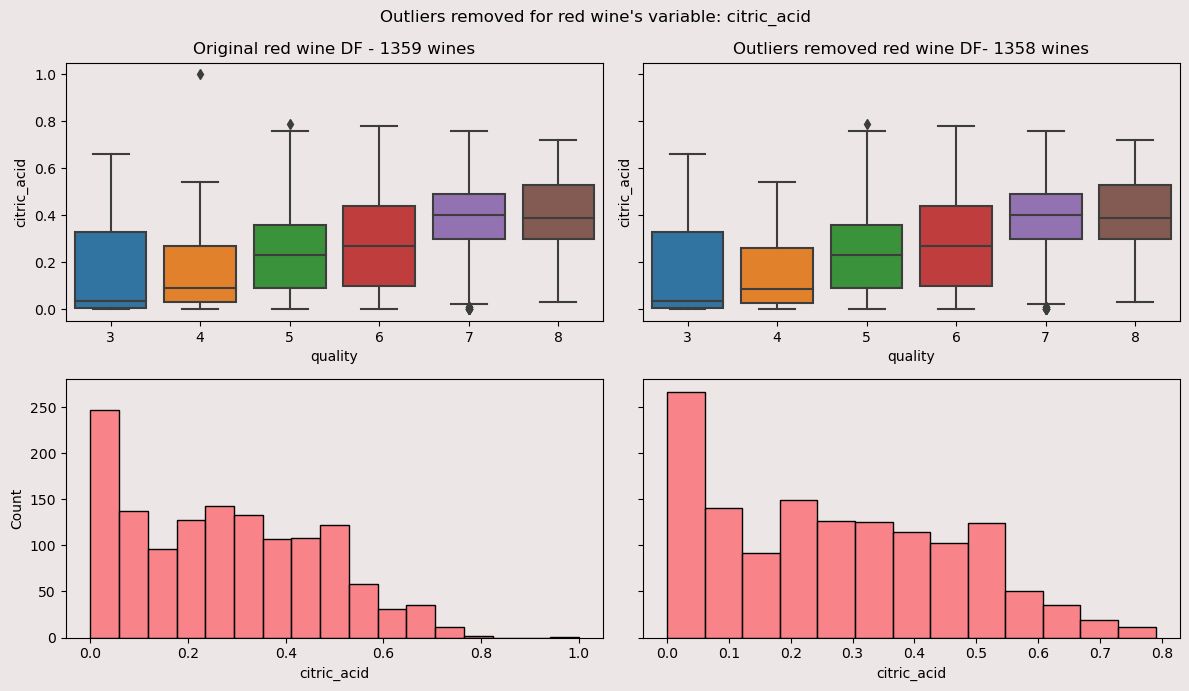

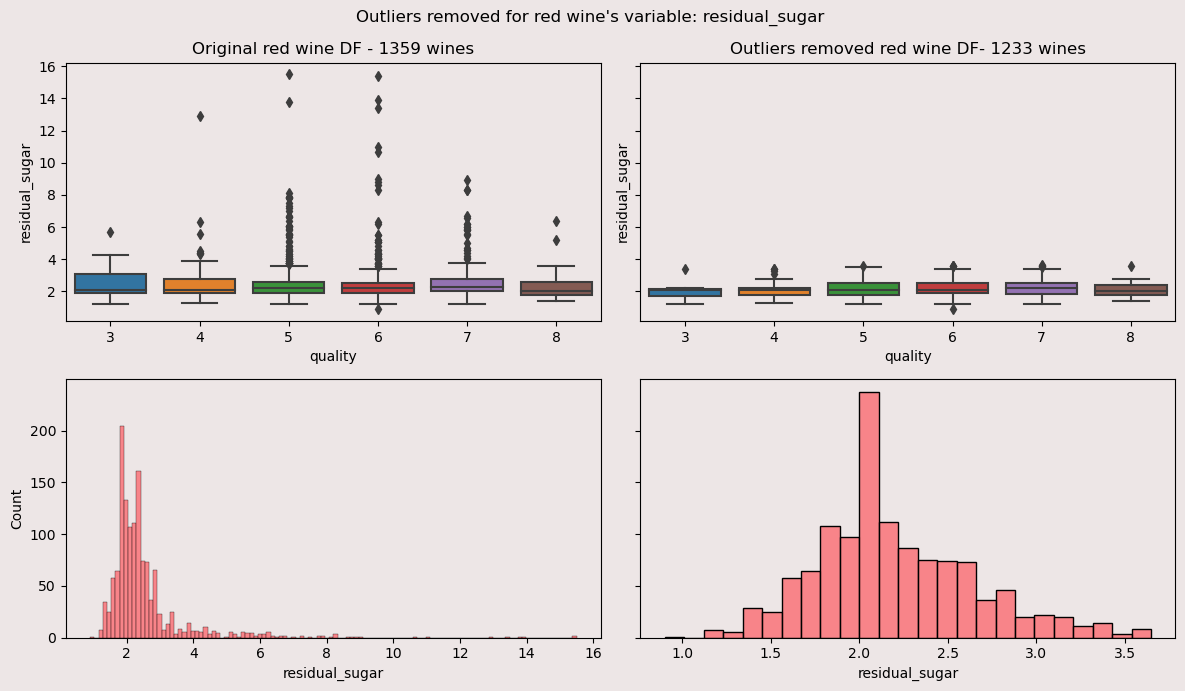

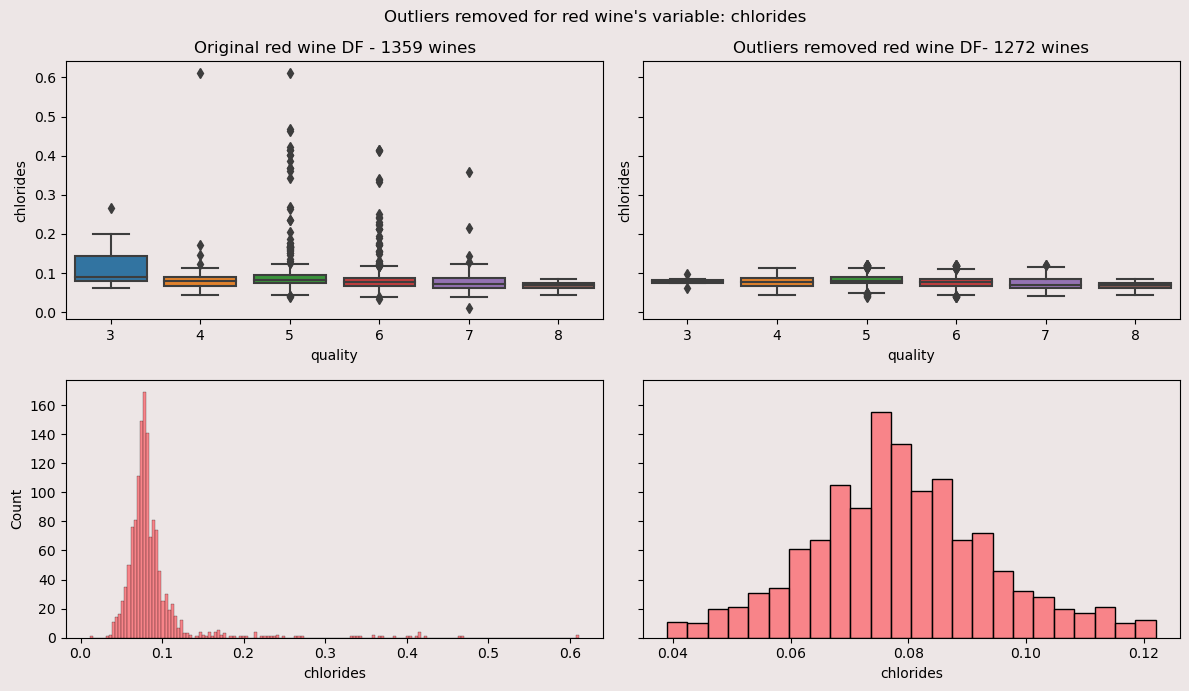

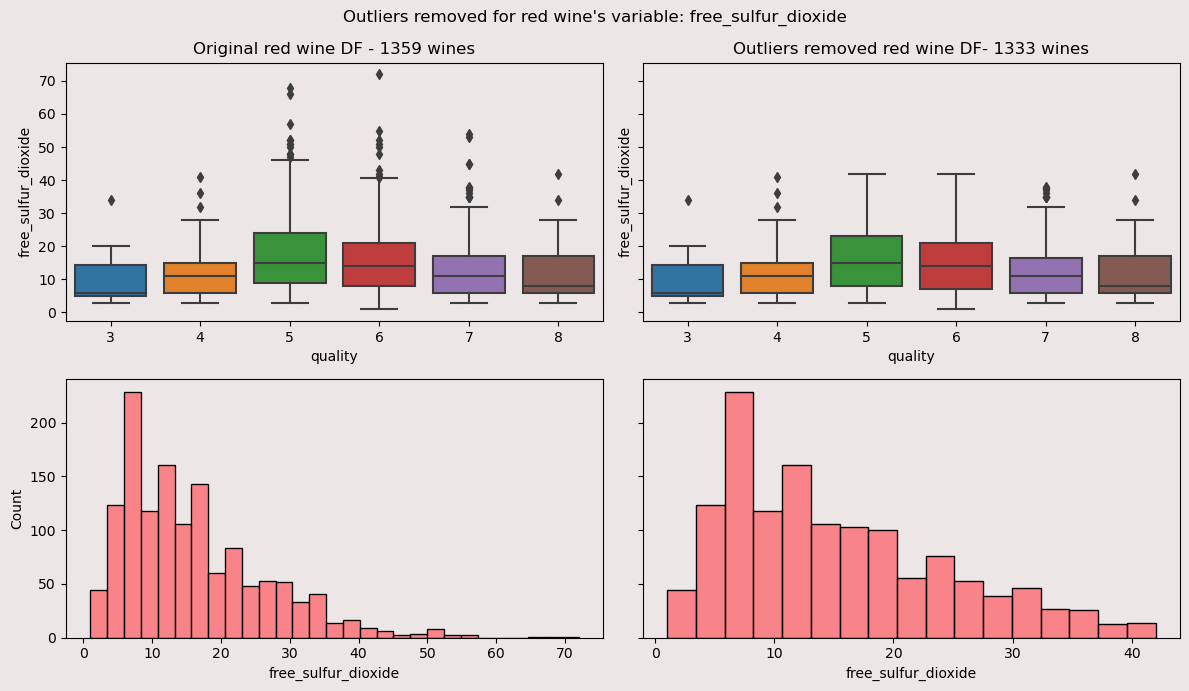

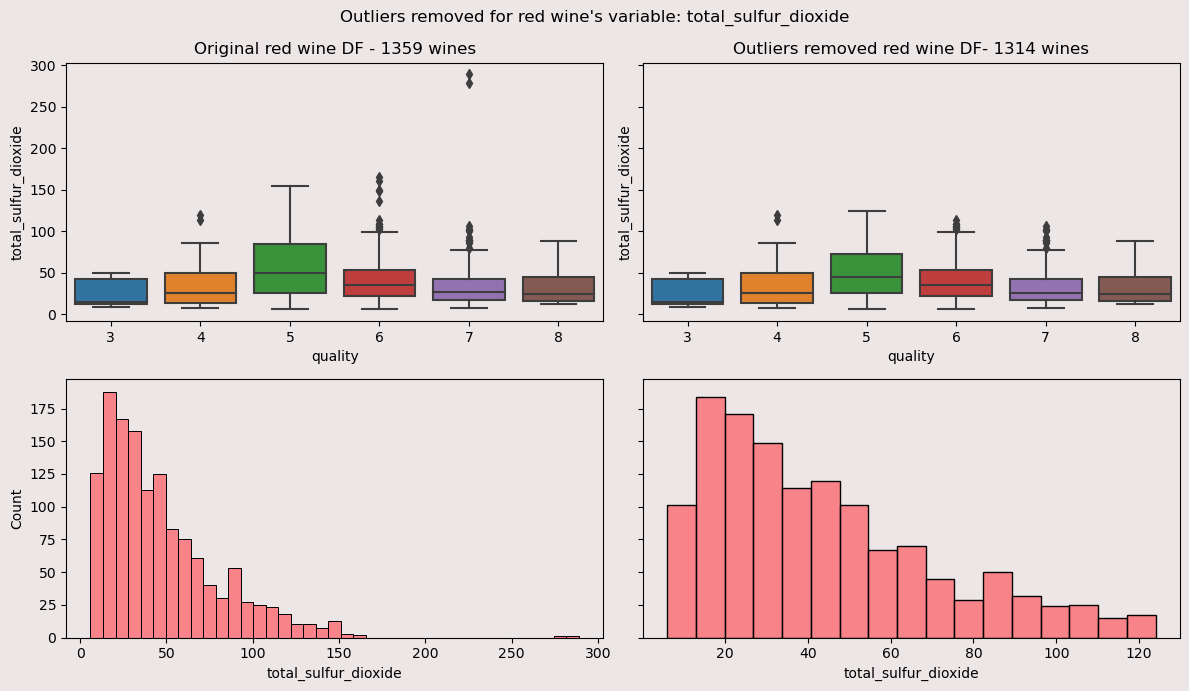

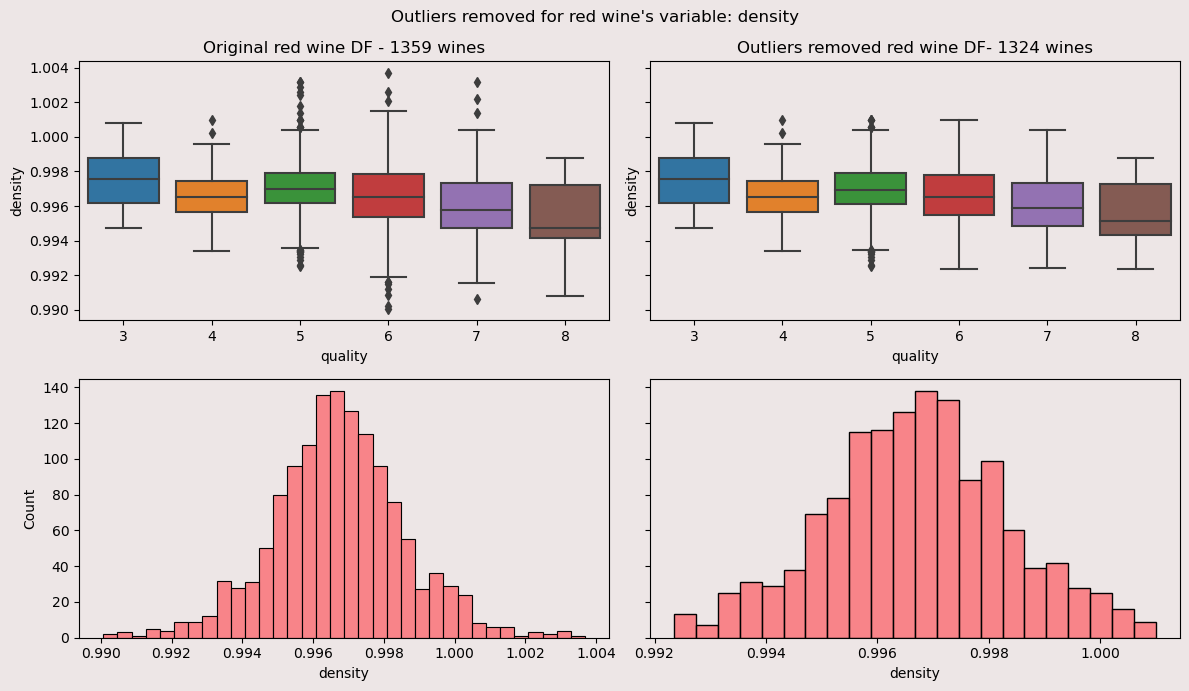

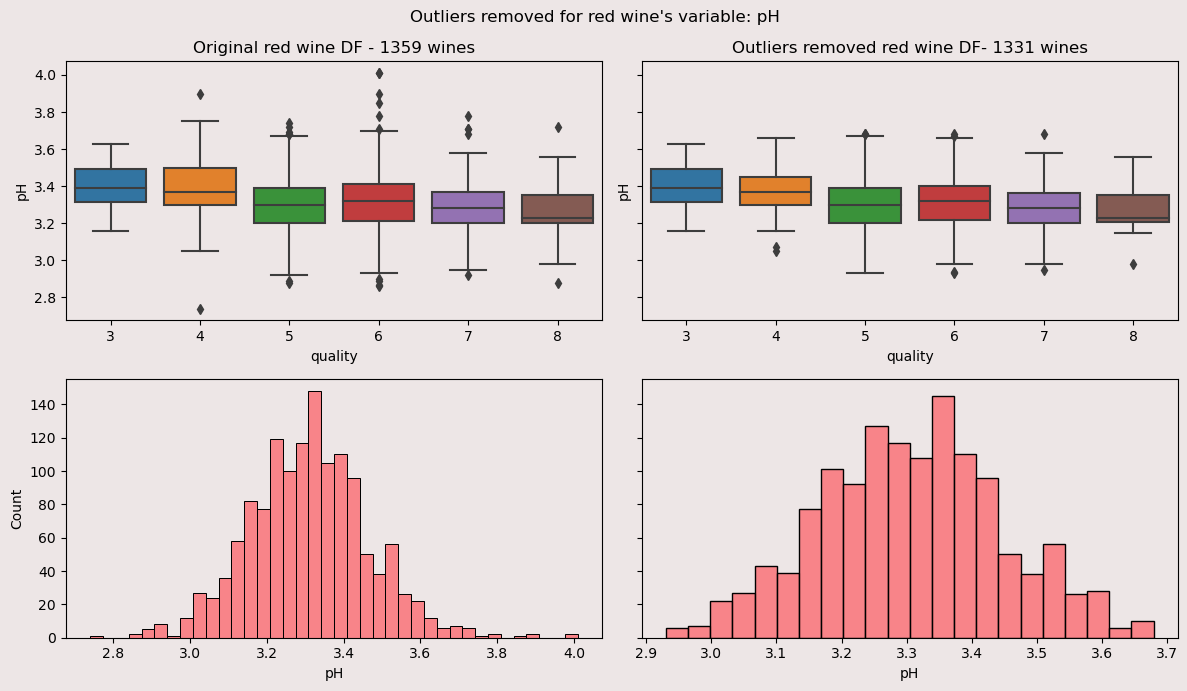

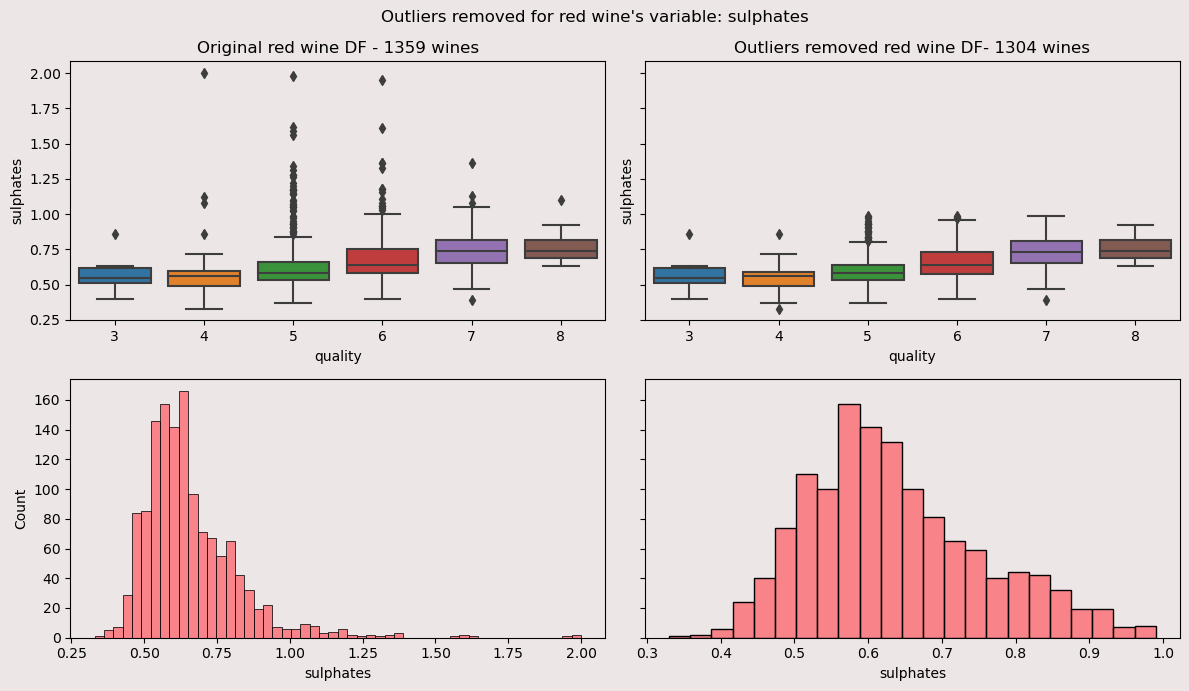

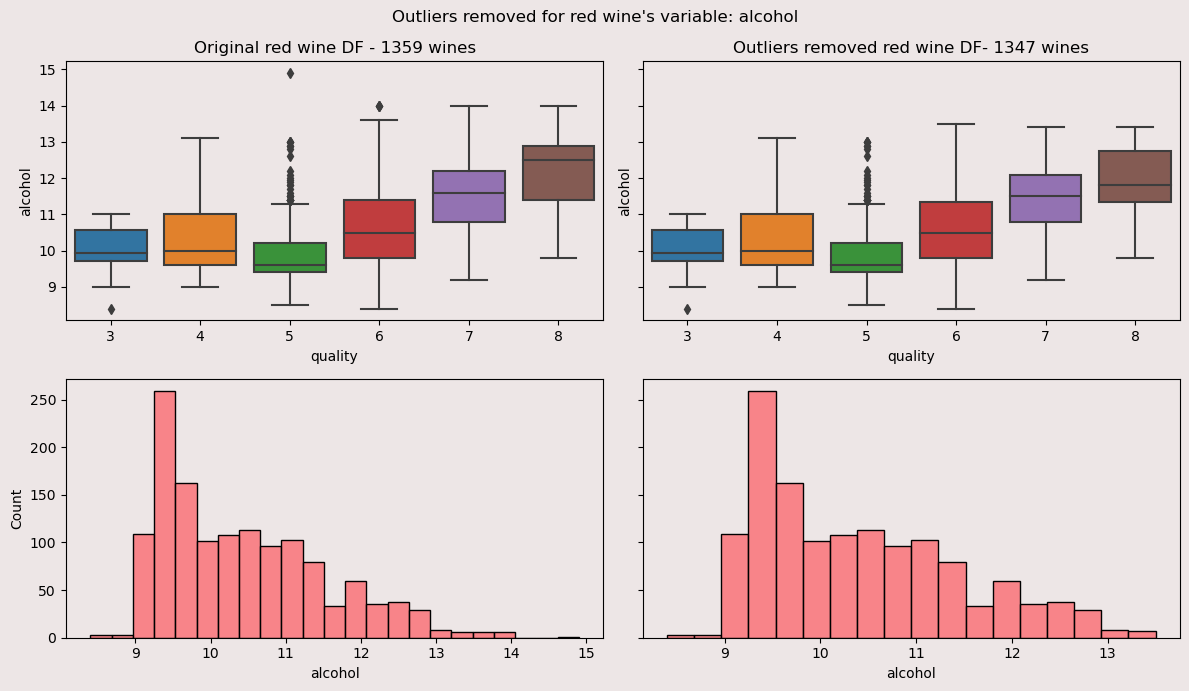

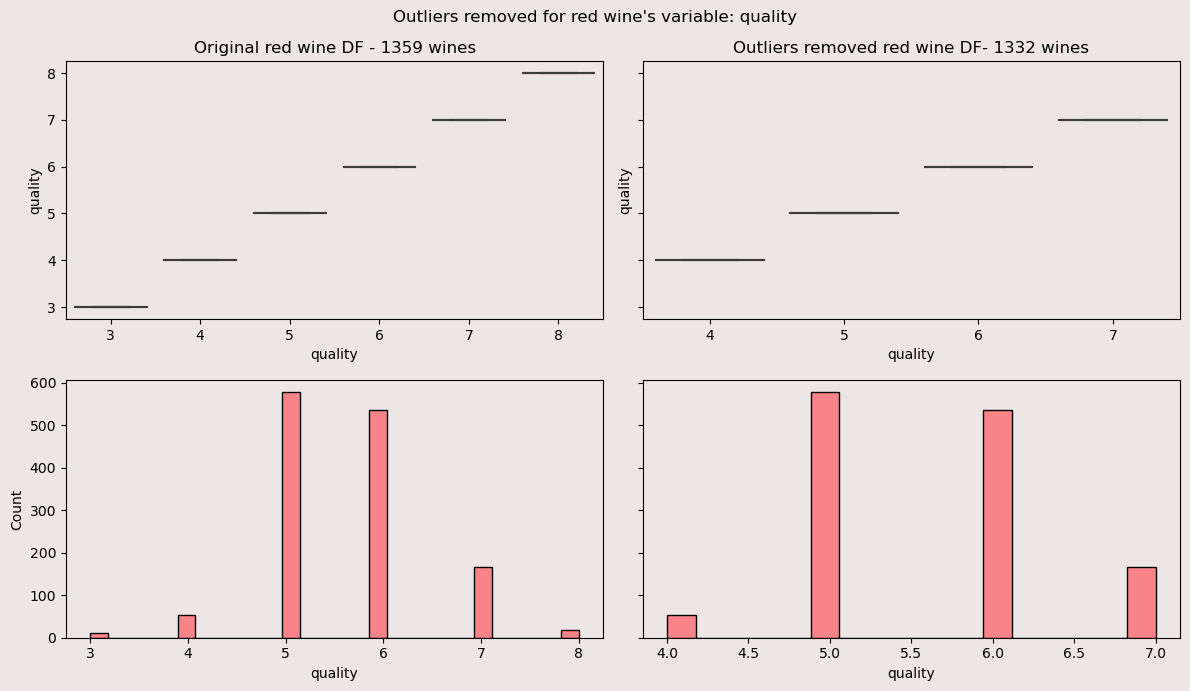

In [174]:
def outlier_comparison(wine_type, variable, threshold, outlier_type):
    if wine_type == 'red':
        colour = red_color
        colour2 = 'white'
        df_org = red_copy
        df_outlier = red_outliers
    if wine_type == 'white':
        colour = white_color
        colour2 = 'white'
        df_org = white_copy
        df_outlier = white_outliers
    
    if outlier_type == 'z':
        df_outlier = outlier_drop_z(df_outlier, variable, threshold)
    elif outlier_type == 'iqr':
        df_outlier = outlier_drop_iqr(df_outlier, variable, threshold)
    fig, axs = plt.subplots(2, 2, figsize=(12, 7), sharey = 'row')
    plt.suptitle(f'Outliers removed for {wine_type} wine\'s variable: {variable}')
    fig.set_facecolor(background_grey)    
    #fig_suptitle(f'{wine_type} wine when teh {variable} outliers are removed')
    fig1 = sns.boxplot(x = df_org['quality'], y = df_org[variable], ax = axs[0,0])
    fig2 = sns.boxplot(x = df_outlier['quality'], y = df_outlier[variable], ax = axs[0,1])
    fig3 = sns.histplot(df_org[variable], ax = axs[1,0], color = colour)
    fig4 = sns.histplot(df_outlier[variable], ax = axs[1,1], color = colour)
    axs[0,0].set_facecolor(background_grey)
    axs[0,0].set_title(f'Original {wine_type} wine DF - {df_org.shape[0]} wines')
    axs[0,1].set_facecolor(background_grey)
    axs[0,1].set_title(f'Outliers removed {wine_type} wine DF- {df_outlier.shape[0]} wines')
    axs[1,0].set_facecolor(background_grey)
    axs[0,1].set_facecolor(background_grey)
    axs[1,1].set_facecolor(background_grey)

    
    plt.tight_layout()
    plt.show()

for val in col_lst:
    outlier_comparison('red', val, 2, 'iqr')
# # print(red_outliers.shape)
# outlier_comparison('red', 'pH', 2, 'iqr')
# outlier_comparison('red', 'pH', 2, 'z')
# outlier_comparison('white', 'residual_sugar', 2, 'z')
# outlier_comparison('white', 'residual_sugar', 2, 'iqr')



In [177]:
'''i want to find the P scores for the normalized data'''
def foneway_eval(df, depen_var, wine_type):

    F, p = stats.f_oneway(df[df['quality_label'] == 'low'][depen_var],
    df[df['quality_label'] == 'medium'][depen_var],
    df[df['quality_label'] == 'high'][depen_var])
    if p < 0.5:
        print(f'Reject the Null hypothesis. {depen_var} causes statisifically different groups for {wine_type}s')
    else:
        print('shite')
    print(F, p)
    return (F,p)

# for val in col_lst:
#     foneway_eval(white_copy, val, 'white wine')
#for val in col_lst:
   #foneway_eval(outlier_drop_iqr(red_copy, 'chlorides', 2), val, 'red wine')
# for val in col_lst:
#     foneway_eval(white_red_df, val, 'both White & Red')
foneway_eval(red_copy, 'chlorides', 'red wine')
foneway_eval(outlier_drop_iqr(red_copy, 'chlorides', 2), 'chlorides', 'red wine -without outliers')


print('booooo')
foneway_eval(red_copy, 'density', 'red wine')
foneway_eval(outlier_drop_iqr(red_copy, 'density', 2), 'density', 'red wine -without outliers')

print('booooo')
foneway_eval(red_copy, 'sulphates', 'red wine')
foneway_eval(outlier_drop_iqr(red_copy, 'sulphates', 2), 'sulphates', 'red wine -without outliers')

Reject the Null hypothesis. chlorides causes statisifically different groups for red wines
11.451953491441138 1.169542636297279e-05
Reject the Null hypothesis. chlorides causes statisifically different groups for red wine -without outlierss
25.66899179679861 1.1794846776399605e-11
booooo
Reject the Null hypothesis. density causes statisifically different groups for red wines
27.53524395935965 1.896902095839095e-12
Reject the Null hypothesis. density causes statisifically different groups for red wine -without outlierss
24.48030145597369 3.636013897704443e-11
booooo
Reject the Null hypothesis. sulphates causes statisifically different groups for red wines
44.93103956978218 1.2765954610673098e-19
Reject the Null hypothesis. sulphates causes statisifically different groups for red wine -without outlierss
126.81917645349486 4.8136146824121626e-51


(126.81917645349486, 4.8136146824121626e-51)

Text(0.5, 1.0, 'Log-Transformed Data')

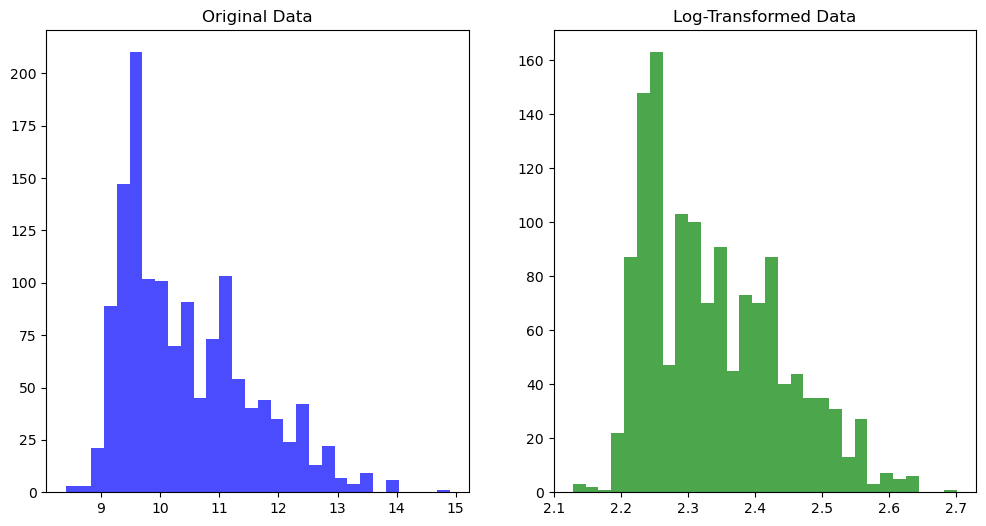

In [110]:
'''lets transform the alcohol data to try to get rid of the right skew'''
transformed_data = np.log(red_copy.alcohol)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(red_copy.alcohol, bins=30, color='blue', alpha=0.7)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=30, color='green', alpha=0.7)
plt.title('Log-Transformed Data')


In [119]:
white_red_df_desc = white_red_df.describe()
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)   
print(white_red_df_desc)
#white_red_df_desc.to_csv('white_red_df_desc', index=True)

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar    chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density           pH    sulphates      alcohol      quality
count    5320.000000       5320.000000  5320.000000     5320.000000  5320.000000          5320.000000           5320.000000  5320.000000  5320.000000  5320.000000  5320.000000  5320.000000
mean        7.215179          0.344130     0.318494        5.048477     0.056690            30.036654            114.109023     0.994535     3.224664     0.533357    10.549241     5.795677
std         1.319671          0.168248     0.147157        4.500180     0.036863            17.805045             56.774223     0.002966     0.160379     0.149743     1.185933     0.879772
min         3.800000          0.080000     0.000000        0.600000     0.009000             1.000000              6.000000     0.987110     2.720000     0.220000     8.000000     3.000000
25%         6.400000          0.230000     0.240000    

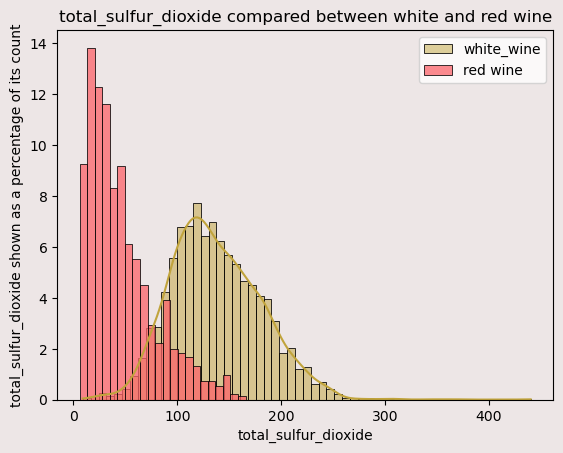

In [184]:
p_value_lst = []
for val in col_lst:
    p_value_lst.append([val,foneway_eval(red_copy, val, 'red wine')[1]])
print('booob')
print(sorted(p_value_lst, key=lambda x: x[1]))



Reject the Null hypothesis. fixed_acidity causes statisifically different groups for red wines
11.16919022625275 1.54455571108665e-05
Reject the Null hypothesis. volatile_acidity causes statisifically different groups for red wines
102.70081940143612 2.9454373140098677e-42
Reject the Null hypothesis. citric_acid causes statisifically different groups for red wines
36.62554116191759 3.224677762429124e-16
Reject the Null hypothesis. residual_sugar causes statisifically different groups for red wines
2.2829223753469203 0.10237758168529125
Reject the Null hypothesis. chlorides causes statisifically different groups for red wines
11.451953491441138 1.169542636297279e-05
Reject the Null hypothesis. free_sulfur_dioxide causes statisifically different groups for red wines
5.019526766731614 0.006730962652541778
Reject the Null hypothesis. total_sulfur_dioxide causes statisifically different groups for red wines
41.6973819039013 2.667379236841679e-18
Reject the Null hypothesis. density causes st

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,colour,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,high
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,low


In [ ]:
p_value_lst2 = []
for val in col_lst:
    p_value_lst2.append([val,foneway_eval(red_copy, val, 'red wine')[1]])

In [186]:
for val in col_lst:
    print(f'{val} kurotisis is {kurtosis(red_outliers[val], fisher = False)}')

fixed_acidity kurotisis is 4.04140364095299
volatile_acidity kurotisis is 4.240240278584964
citric_acid kurotisis is 2.209567323441261
residual_sugar kurotisis is 32.252253844801416
chlorides kurotisis is 41.47828083299725
free_sulfur_dioxide kurotisis is 4.881322604081556
total_sulfur_dioxide kurotisis is 7.022988115245262
density kurotisis is 3.8231940045653974
pH kurotisis is 3.8721444062119583
sulphates kurotisis is 14.057065299491635
alcohol kurotisis is 3.154739987812143
quality kurotisis is 3.334593750321813
